In [1]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp

import nir
# for loading dataset
import torch

import matplotlib.pyplot as plt

In [2]:
ng = nir.read("braille_subtract.nir")

In [3]:
ng.nodes.keys()

dict_keys(['fc1', 'fc2', 'input', 'lif1.lif', 'lif1.w_rec', 'lif2', 'output'])

In [4]:
ng.nodes.keys()

dict_keys(['fc1', 'fc2', 'input', 'lif1.lif', 'lif1.w_rec', 'lif2', 'output'])

In [5]:
data = torch.load("ds_test.pt")

In [6]:
x, y = data.tensors

In [7]:
x = jnp.array(x)

In [8]:
y = jnp.array(y)

In [9]:
x.shape # --> 256 time

(140, 256, 12)

In [10]:
SNN, params = spyx.nir.from_nir(ng, x, dt=1e-4, return_all_states=True)

[INFO] found RNN subgraph, replacing with NIRGraph node
[INFO] subgraph edges: ('lif1.lif', 'lif1.w_rec'), ('lif1.w_rec', 'lif1.lif')
found subgraph, trying to parse as RNN
found subgraph, trying to parse as RNN


In [11]:
params.keys()

dict_keys(['linear', 'RCuBaLIF', 'linear_1', 'CuBaLIF'])

In [12]:
ng.nodes["lif1"].nodes["lif1.w_rec"].weight.shape

(55, 55)

In [13]:
a, b = SNN.apply(params, x)

found subgraph, trying to parse as RNN


In [14]:
a.shape

(140, 256, 7)

In [15]:
preds = jnp.argmax(jnp.sum(a,axis=1), axis=1)
preds

Array([1, 4, 4, 1, 0, 1, 1, 4, 4, 0, 4, 0, 5, 0, 0, 1, 4, 4, 5, 2, 0, 4,
       4, 0, 4, 3, 4, 5, 4, 4, 4, 4, 2, 0, 4, 5, 1, 0, 4, 0, 1, 4, 0, 4,
       5, 4, 0, 0, 0, 5, 4, 0, 0, 4, 4, 4, 5, 0, 4, 0, 5, 0, 0, 0, 0, 4,
       1, 4, 6, 5, 0, 0, 0, 4, 0, 4, 4, 0, 1, 5, 4, 0, 4, 1, 0, 1, 4, 0,
       4, 0, 0, 0, 4, 0, 5, 4, 2, 0, 1, 0, 0, 0, 5, 0, 4, 1, 5, 1, 4, 4,
       4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 1, 3, 0, 0, 4, 0, 4, 4, 6, 4, 0,
       4, 5, 4, 5, 5, 4, 4, 5], dtype=int32)

In [16]:
y

Array([1, 3, 2, 2, 6, 1, 1, 3, 4, 5, 4, 0, 5, 5, 0, 2, 4, 3, 1, 2, 5, 2,
       4, 6, 2, 2, 4, 1, 4, 4, 1, 3, 2, 0, 4, 5, 1, 0, 3, 5, 1, 2, 0, 4,
       5, 4, 5, 6, 6, 1, 4, 5, 0, 2, 3, 4, 5, 0, 2, 5, 5, 5, 6, 5, 6, 4,
       1, 2, 6, 1, 0, 0, 6, 4, 0, 3, 3, 0, 1, 6, 2, 0, 3, 1, 0, 1, 2, 0,
       3, 0, 0, 0, 4, 6, 1, 3, 2, 5, 2, 6, 0, 5, 5, 0, 3, 1, 6, 6, 3, 2,
       4, 4, 6, 3, 6, 2, 2, 5, 3, 6, 2, 1, 3, 6, 5, 4, 5, 4, 1, 6, 3, 0,
       3, 6, 3, 1, 6, 4, 3, 1], dtype=int32)

In [23]:
spyx.fn.integral_accuracy(a, y)

(Array(0.45, dtype=float32),
 Array([1, 4, 4, 1, 0, 1, 1, 4, 4, 0, 4, 0, 5, 0, 0, 1, 4, 4, 5, 2, 0, 4,
        4, 0, 4, 3, 4, 5, 4, 4, 4, 4, 2, 0, 4, 5, 1, 0, 4, 0, 1, 4, 0, 4,
        5, 4, 0, 0, 0, 5, 4, 0, 0, 4, 4, 4, 5, 0, 4, 0, 5, 0, 0, 0, 0, 4,
        1, 4, 6, 5, 0, 0, 0, 4, 0, 4, 4, 0, 1, 5, 4, 0, 4, 1, 0, 1, 4, 0,
        4, 0, 0, 0, 4, 0, 5, 4, 2, 0, 1, 0, 0, 0, 5, 0, 4, 1, 5, 1, 4, 4,
        4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 1, 3, 0, 0, 4, 0, 4, 4, 6, 4, 0,
        4, 5, 4, 5, 5, 4, 4, 5], dtype=int32))

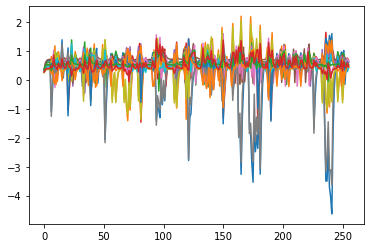

In [18]:
plt.plot(b[1][0])
plt.show()